##EE 399
##Sam Tam
##4/22/23
##HW 3



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from itertools import combinations
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

1. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector and each column of your data matrix is a different image.

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = np.array(mnist['data'])
y = np.array(mnist['target'])
# Reshape the images into column vectors
X_col = X.T
# Perform the SVD
U, S, VT = np.linalg.svd(X_col, full_matrices=False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


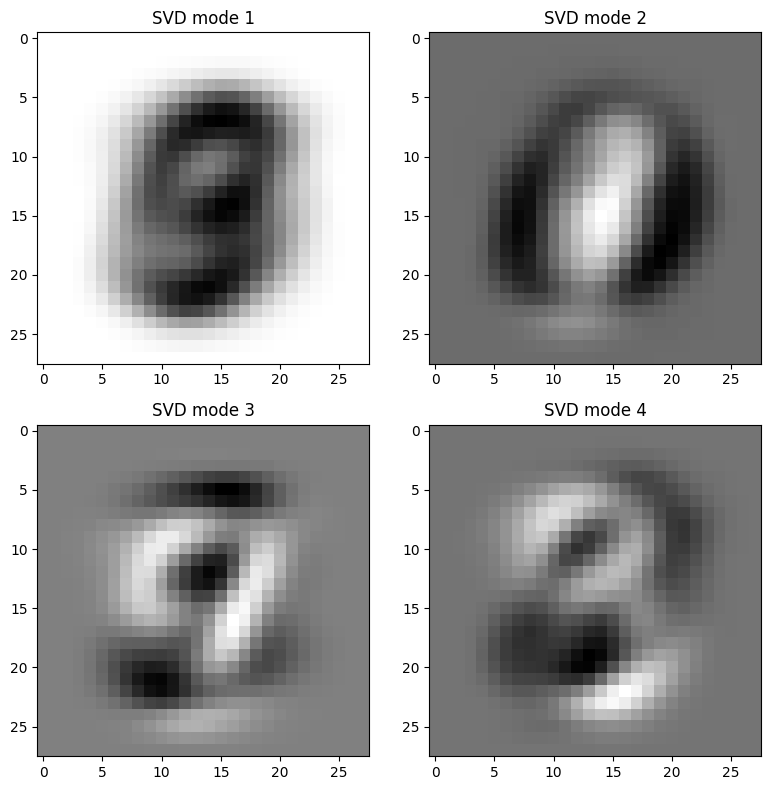

In [3]:
# Plot the first 4 left singular vectors as images
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = ax.ravel()
for i in range(4):
    ax[i].imshow(U[:,i].reshape(28,28), cmap='gray')
    ax[i].set_title(f'SVD mode {i+1}')

plt.tight_layout()
plt.show()

2. What does the singular value spectrum look like and how many modes are necessary for good image reconstruction? (i.e. what is the rank r of the digit space?)

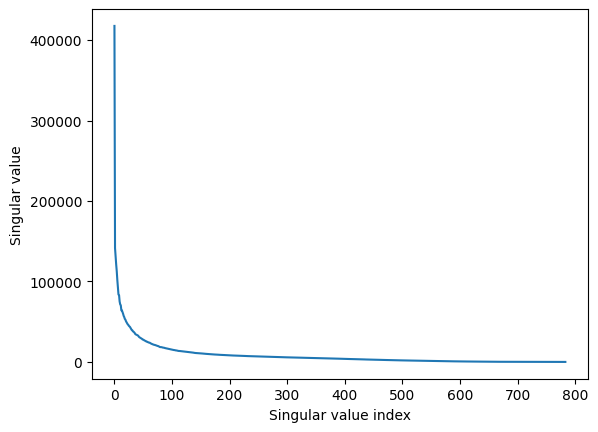

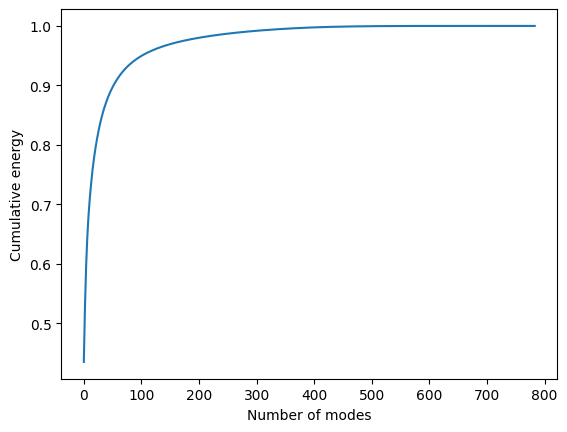

In [4]:
# Plot the singular values
plt.plot(S)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.show()
# Plot the cumulative sum of singular values
cumulative_energy = np.cumsum(S**2) / np.sum(S**2)
# Plot the cumulative energy
plt.plot(cumulative_energy)
plt.xlabel('Number of modes')
plt.ylabel('Cumulative energy')
plt.show()

In [5]:
r = np.argmax(cumulative_energy >= 0.9) + 1 # add 1 because of zero indexing
print("The rank r of the digit space is {:.0f}".format(r))

The rank r of the digit space is 53


3. What is the interpretation of the U, Σ, and V matrices?

  The SVD decomposition gives us three matrices: U, Σ, and V. The U and V matrices are orthonormal matrices, and the Σ matrix is a diagonal matrix of singular values.

  The columns of the U matrix are the left singular vectors, and they represent the eigenvectors of the covariance matrix of the digit images. The columns of the V matrix are the right singular vectors, and they represent the eigenvectors of the covariance matrix of the digit images transpose. The Σ matrix contains the singular values, which give us information about the importance of each mode.

4. On a 3D plot, project onto three selected V-modes (columns) colored by their digit label. For example, columns 2,3, and 5.

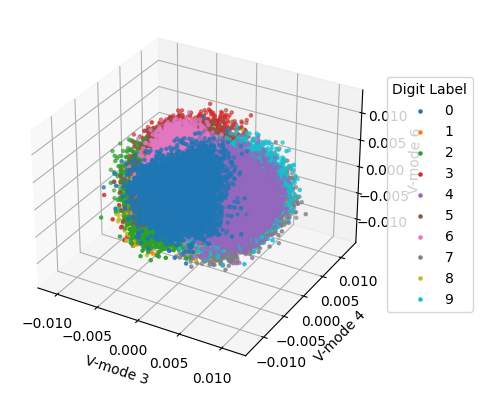

In [6]:
# Select three V-modes to project onto
v_modes = [2, 3, 5]

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Loop over each digit and plot its projection onto the three selected V-modes
for i in range(10):
    idx = np.where(y == str(i))[0]
    ax.scatter(VT[v_modes[0], idx], VT[v_modes[1], idx], VT[v_modes[2], idx], label=str(i), s=5)

# Add labels and legend
ax.set_xlabel('V-mode ' + str(v_modes[0] + 1))
ax.set_ylabel('V-mode ' + str(v_modes[1] + 1))
ax.set_zlabel('V-mode ' + str(v_modes[2] + 1))
ax.legend(title='Digit Label', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

- Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify them.

In [7]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype('int')
X = X / 255.0 # Scale the pixel values to [0, 1]
# Select two digits to classify
digit1 = 0
digit2 = 1

# Create a binary classification problem for the two selected digits
X_bin = X[(y == digit1) | (y == digit2)]
y_bin = y[(y == digit1) | (y == digit2)]
y_bin = (y_bin == digit1).astype('int')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

# Standardize the training data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Perform PCA to reduce the dimensionality of the data
n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)

# Perform LDA to learn a linear classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

# Standardize the test data and apply PCA
X_test_std = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_std)

# Test the classifier on the test set
y_pred = lda.predict(X_test_pca)
accuracy = (y_pred == y_test).mean()
print(f"Test accuracy: {accuracy:.2f}")

digit_labels = [0, 1]
X_train_lda = X_train_pca[np.isin(y_train, digit_labels)]
y_train_lda = y_train[np.isin(y_train, digit_labels)]
lda.fit(X_train_lda, y_train_lda)

# Compute the classification accuracy on the training set
y_train_pred = lda.predict(X_train_lda)
train_accuracy = np.mean(y_train_pred == y_train_lda)
print(f"Training accuracy: {train_accuracy:.2f}")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Test accuracy: 1.00
Training accuracy: 1.00


- Pick three digits. Try to build a linear classifier to identify these three now.

In [8]:
# Select three digits to classify
digit1 = 0
digit2 = 1
digit3 = 2

# Create a multi-class classification problem for the three selected digits
X_multi = X[(y == digit1) | (y == digit2) | (y == digit3)]
y_multi = y[(y == digit1) | (y == digit2) | (y == digit3)]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Standardize the training data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Perform PCA to reduce the dimensionality of the data
n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)

# Perform LDA to learn a linear classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)

# Standardize the test data and apply PCA
X_test_std = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_std)

# Test the classifier on the test set
y_pred = lda.predict(X_test_pca)
accuracy = (y_pred == y_test).mean()
print(f"Test accuracy: {accuracy:.2f}")

digit_labels = [0, 1, 2]
X_train_lda = X_train_pca[np.isin(y_train, digit_labels)]
y_train_lda = y_train[np.isin(y_train, digit_labels)]
lda.fit(X_train_lda, y_train_lda)

# Compute the classification accuracy on the training set
y_train_pred = lda.predict(X_train_lda)
train_accuracy = np.mean(y_train_pred == y_train_lda)
print(f"Training accuracy: {train_accuracy:.2f}")

Test accuracy: 0.97
Training accuracy: 0.97


- Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy of the separation with LDA on the test data.

In [9]:
X, y = mnist.data, mnist.target.astype('int')
X = X / 255.0 # Scale the pixel values to [0, 1]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Perform PCA to reduce the dimensionality of the data
n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Compute pairwise classification accuracy using LDA
digit_pairs = combinations(range(10), 2)
pairwise_accuracy = {}
for digit1, digit2 in digit_pairs:
    X_pair = X_train_pca[(y_train == digit1) | (y_train == digit2)]
    y_pair = y_train[(y_train == digit1) | (y_train == digit2)]
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_pair, y_pair)
    X_test_pair = X_test_pca[(y_test == digit1) | (y_test == digit2)]
    y_test_pair = y_test[(y_test == digit1) | (y_test == digit2)]
    y_pred = lda.predict(X_test_pair)
    accuracy = (y_pred == y_test_pair).mean()
    pairwise_accuracy[(digit1, digit2)] = accuracy

# Find the most difficult digit pair to separate
most_difficult_pair = min(pairwise_accuracy, key=pairwise_accuracy.get)
accuracy = pairwise_accuracy[most_difficult_pair]
digit1, digit2 = most_difficult_pair
print(f"Digits {digit1} and {digit2} are the most difficult to separate with test accuracy {accuracy:.2f}")

digit_labels = [digit1, digit2]
X_train_lda = X_train_pca[np.isin(y_train, digit_labels)]
y_train_lda = y_train[np.isin(y_train, digit_labels)]
lda.fit(X_train_lda, y_train_lda)

# Compute the classification accuracy on the training set
y_train_pred = lda.predict(X_train_lda)
train_accuracy = np.mean(y_train_pred == y_train_lda)
print(f"Training accuracy: {train_accuracy:.2f}")

Digits 5 and 8 are the most difficult to separate with test accuracy 0.94
Training accuracy: 0.95


- Which two digits in the data set are most easy to separate? Quantify the accuracy of the separation with LDA on the test data.

In [10]:
# Find the most easy digit pair to separate
most_easy_pair = max(pairwise_accuracy, key=pairwise_accuracy.get)
accuracy = pairwise_accuracy[most_easy_pair]
digit1, digit2 = most_easy_pair
print(f"Digits {digit1} and {digit2} are the most easy to separate with test accuracy {accuracy:.2f}")

digit_labels = [digit1, digit2]
X_train_lda = X_train_pca[np.isin(y_train, digit_labels)]
y_train_lda = y_train[np.isin(y_train, digit_labels)]
lda.fit(X_train_lda, y_train_lda)

# Compute the classification accuracy on the training set
y_train_pred = lda.predict(X_train_lda)
train_accuracy = np.mean(y_train_pred == y_train_lda)
print(f"Training accuracy: {train_accuracy:.2f}")

Digits 1 and 4 are the most easy to separate with test accuracy 1.00
Training accuracy: 0.99


- SVM (support vector machines) and decision tree classifiers were the state-of-the-art until about 2014. How well do these separate between all ten digits? (see code below to get started).

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the SVM classifier
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
# Test the SVM classifier
y_pred_svm = svm.predict(X_test)
# print('SVM accuracy on training set:', svm.score(X_train, y_train))
print('SVM accuracy on testing set:', accuracy_score(y_test, y_pred_svm))
# Train the decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Test the decision tree classifier
y_pred_dt = dt.predict(X_test)
# print('Decision tree accuracy on training set:', dt.score(X_train, y_train))
print('Decision tree accuracy on testing set:', accuracy_score(y_test, y_pred_dt))

SVM accuracy on testing set: 0.9351428571428572
Decision tree accuracy on testing set: 0.871


- Compare the performance between LDA, SVM and decision trees on the hardest and easiest pair of digits to separate (from above)

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the hardest and easiest pair of digits
hardest_digits = (5, 8)
easiest_digits = (1, 4)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train and test LDA, SVM, and decision tree for the hardest pair of digits
X_train_hard = X_train[(y_train == hardest_digits[0]) | (y_train == hardest_digits[1]), :]
y_train_hard = y_train[(y_train == hardest_digits[0]) | (y_train == hardest_digits[1])]
X_test_hard = X_test[(y_test == hardest_digits[0]) | (y_test == hardest_digits[1]), :]
y_test_hard = y_test[(y_test == hardest_digits[0]) | (y_test == hardest_digits[1])]

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_hard, y_train_hard)
svm = SVC()
svm.fit(X_train_hard, y_train_hard)
dt = DecisionTreeClassifier()
dt.fit(X_train_hard, y_train_hard)

y_pred_lda_hard = lda.predict(X_test_hard)
y_pred_svm_hard = svm.predict(X_test_hard)
y_pred_dt_hard = dt.predict(X_test_hard)

accuracy_lda_hard = accuracy_score(y_test_hard, y_pred_lda_hard)
accuracy_svm_hard = accuracy_score(y_test_hard, y_pred_svm_hard)
accuracy_dt_hard = accuracy_score(y_test_hard, y_pred_dt_hard)

print('Hardest pair of digits:')
print('LDA accuracy on training set:', lda.score(X_train_hard, y_train_hard))
print('LDA accuracy on testing set:', accuracy_lda_hard)
print('SVM accuracy on training set:', svm.score(X_train_hard, y_train_hard))
print('SVM accuracy on testing set:', accuracy_svm_hard)
print('Decision tree accuracy on training set:', svm.score(X_train_hard, y_train_hard))
print('Decision tree accuracy on testing set:', accuracy_dt_hard)

# Train and test LDA, SVM, and decision tree for the easiest pair of digits
X_train_easy = X_train[(y_train == easiest_digits[0]) | (y_train == easiest_digits[1]), :]
y_train_easy = y_train[(y_train == easiest_digits[0]) | (y_train == easiest_digits[1])]
X_test_easy = X_test[(y_test == easiest_digits[0]) | (y_test == easiest_digits[1]), :]
y_test_easy = y_test[(y_test == easiest_digits[0]) | (y_test == easiest_digits[1])]

lda.fit(X_train_easy, y_train_easy)
svm.fit(X_train_easy, y_train_easy)
dt.fit(X_train_easy, y_train_easy)

y_pred_lda_easy = lda.predict(X_test_easy)
y_pred_svm_easy = svm.predict(X_test_easy)
y_pred_dt_easy = dt.predict(X_test_easy)

accuracy_lda_easy = accuracy_score(y_test_easy, y_pred_lda_easy)
accuracy_svm_easy = accuracy_score(y_test_easy, y_pred_svm_easy)
accuracy_dt_easy = accuracy_score(y_test_easy, y_pred_dt_easy)

print('\nEasiest pair of digits:')
print('LDA accuracy on training set:', lda.score(X_train_easy, y_train_easy))
print('LDA accuracy on testing set:', accuracy_lda_easy)
print('SVM accuracy on training set:', svm.score(X_train_easy, y_train_easy))
print('SVM accuracy on testing set:', accuracy_svm_easy)
print('Decision tree accuracy on training set:', svm.score(X_train_easy, y_train_easy))
print('Decision tree accuracy on testing set:', accuracy_dt_easy)

Hardest pair of digits:
LDA accuracy on training set: 0.968690521507423
LDA accuracy on testing set: 0.9513307984790874
SVM accuracy on training set: 0.9977160258850399
SVM accuracy on testing set: 0.9851711026615969
Decision tree accuracy on training set: 0.9977160258850399
Decision tree accuracy on testing set: 0.9532319391634981

Easiest pair of digits:
LDA accuracy on training set: 0.9969507030323564
LDA accuracy on testing set: 0.9927461139896373
SVM accuracy on training set: 0.9990682703709978
SVM accuracy on testing set: 0.9968911917098445
Decision tree accuracy on training set: 0.9990682703709978
Decision tree accuracy on testing set: 0.9913644214162349
